# Capstone Project - Data Science @ BrainStation

##  Introduction

This Jupiter notebook forms the core component of my Capstone project under the Data Science Diploma Program at BrainStation, Vancouver. In this notebook, we use base Python together with some of the widely used libraries to investigate, analyse a dataset sourced from loan data released by Lending Club, a US-based peer-to-peer lender. At it's peak, Lending club was largest P2P lender in the world with assets of ~16 billion USD. The dataset contains the features of various loans extended by Lending Club spanning from 2007 and 2018 and the corresponding details of the borrowers, who had availed the loan. The key detail of the loan captured in the dataset is 'loan_status', which has two values 'Fully Paid' or 'Charged Off', which means all these loans have been closed and there are no running loans in this dataset.

The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/jeandedieunyandwi/lending-club-dataset/code?datasetId=608703&sortBy=voteCount).

In this note, I will be demonstrating how to perform EDA, visualise data, and apply some machine learning techniques to solves problem of prediction.


## Table of Contents
[1. Loading data & checking high-level details](#Step-1:-Loading-data-&-checking-high-level-details) <br>
- [Data Dictionary](#Data-Dictionary)



[2. Verifying assumptions associated with linear regression models](#Step-2:-Verifying-assumptions-associated-with-linear-regression-models) <br>
- [Linearity](#2.1.-Linearity) <br>
- [Independence](#2.2.-Independence-or-No-Multicollienearity)
- [Normality](#2.3.-Residuals-Are-Normally-Distributed)
- [Homoscedasticity](#2.4.-Homoscedasticity)

[3. Variable selection for model](#Step-3:-Variable-selection-for-model) <br>
- [Backward or Top-Down approach](#3.1.-Backward-or-Top-Down-approach)
- [Forward or Bottom-Up approach](#3.2.-Forward-or-Bottom-Up-approach)

[4. Model Diagnostics](#Step-4:-Model-Diagnostics)
- [Residuals](#4.1.-Residuals)
- [Homoscedasticity](#4.2-Homoscedasticity)

[5. Conclusion](#5.-Conclusion)

### Data Dictionary

| S.No | Column Name           | Description                                                                                                 |
|------|-----------------------|-------------------------------------------------------------------------------------------------------------|
| 0    | loan_amount           | The listed amount of the loan in USD applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
| 1    | term                  | The number of payments on the loan. Values are in months and can be either 36 or 60.                          |
| 2    | int_rate              | Interest Rate on the loan                                                                                    |
| 3    | installment           | The monthly payment owed by the borrower                                                                    |                                           
| 4    | grade                 | Lending Club assigned loan grade                                                                                      |
| 5    | sub_grade             | Lending Club assigned loan subgrade                                                                                   |
| 6    | emp_title             | The job title supplied by the Borrower when applying for the loan.                                          |   
| 7    | emp_length            | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.|
| 8    | home_ownership        | The homeownership status provided by the borrower during registration or obtained from the credit report. The values are: RENT, OWN, MORTGAGE, OTHER|
| 9    | annual_inc            | The self-reported annual income provided by the borrower during registration.                                 |
| 10   | verification_status   | Indicates if income was verified by LC, not verified, or if the income source was verified                    |
| 11   | issue_d               | The month which the loan was funded                                                                         |
| 12   | loan_status           | Current status of the loan                                                                                 |
| 13   | purpose               | A category provided by the borrower for the loan request.                                                   |
| 14   | title                 | The loan title provided by the borrower                                                                    |
| 15   | zip_code              | The first 3 numbers of the zip code provided by the borrower in the loan application.                         |
| 16   | addr_state            | The state provided by the borrower in the loan application                                                  |
| 17   | dti                   | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
| 18   | earliest_cr_line      | The month the borrower's earliest reported credit line was opened                                            |
| 19   | open_acc              | The number of open credit lines in the borrower's credit file.                                               |
| 20   | pub_rec               | Number of derogatory public records                                                                        |
| 21   | revol_bal             | Total credit revolving balance                                                                             |
| 22   | revol_util            | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.|
| 23   | total_acc             | The total number of credit lines currently in the borrower's credit file                                     |
| 24   | initial_list_status   | The initial listing status of the loan. Possible values are – W, F. W stands for Whole loan and F stands for fractional.                                           |
| 25   | application_type      | Indicates whether the loan is an individual application or a joint application with two co-borrowers         |
| 26   | mort_acc              | Number of mortgage accounts.                                                                               |
| 27   | pub_rec_bankruptcies  | Number of public record bankruptcies 

### Data Loading

In [1]:
#Import the required libraries

import numpy as np # Linear alzebra
import pandas as pd # Data manipulation

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import hvplot.pandas 

# import library to filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read CSV using pandas and name data fram as raw_df
raw_df = pd.read_csv("lending_club_loan_two.csv")

In [3]:
# Check for the size of the dataset
raw_df.shape

(396030, 27)

Data frame has 396030 rows or observations and 27 columns

In [4]:
# Change the default pandas dataframe display option to enable viewing all columns of the dataframe
pd.set_option('display.max_columns', None) # This option is enabled to look at all the columns in a data frame

In [5]:
# Take a glimpse of the dataframe
raw_df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
# Check the column names and data types
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**Feature Engineering**: 
1. New columns `month` and `year` could be extracted from `issue_d` column  
2. New columns `city`, `state` and `pincode` could be extracted from `address` column 
3. New column `inc_by_loan` = (`annual_inc`)/(`loan_amnt`) could be calculated.
4. New column `debt` = `dti` * `annual_inc` could be calculated


### Summary Statistics of Dataset

In [7]:
# Calculate brief summary statistics
raw_df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14114.0,8357.0,500.0,8000.0,12000.0,20000.0,40000.0
int_rate,396030.0,14.0,4.0,5.0,10.0,13.0,16.0,31.0
installment,396030.0,432.0,251.0,16.0,250.0,375.0,567.0,1534.0
annual_inc,396030.0,74203.0,61638.0,0.0,45000.0,64000.0,90000.0,8706582.0
dti,396030.0,17.0,18.0,0.0,11.0,17.0,23.0,9999.0
open_acc,396030.0,11.0,5.0,0.0,8.0,10.0,14.0,90.0
pub_rec,396030.0,0.0,1.0,0.0,0.0,0.0,0.0,86.0
revol_bal,396030.0,15845.0,20592.0,0.0,6025.0,11181.0,19620.0,1743266.0
revol_util,395754.0,54.0,24.0,0.0,36.0,55.0,73.0,892.0
total_acc,396030.0,25.0,12.0,2.0,17.0,24.0,32.0,151.0


1. **loan_amount** The average loan is ~14,113 USD. Min loan amount is 500.00 USD and max is 40,000.00 USD. 
2. **int_rate**	The interest rate on an average is 13.63%

## Data Cleaning

### Unique values

In [8]:
# Percentage of unique values in columns, which

# Calculate number of unique values in each column of data frame
unique_values = raw_df.nunique()

# Calculate total values in each column
count_values  = raw_df.count()

# Calculate percentage of unique values and sort the values in descending order
percentage_unique_values = (unique_values * 100 / count_values).sort_values(ascending = False)

# Print the percentages, rounded to one decimal
display(percentage_unique_values.round())

address                 99.0
emp_title               46.0
installment             14.0
revol_bal               14.0
title                   12.0
annual_inc               7.0
dti                      1.0
loan_amnt                0.0
revol_util               0.0
earliest_cr_line         0.0
int_rate                 0.0
total_acc                0.0
issue_d                  0.0
open_acc                 0.0
mort_acc                 0.0
sub_grade                0.0
pub_rec                  0.0
purpose                  0.0
emp_length               0.0
pub_rec_bankruptcies     0.0
grade                    0.0
home_ownership           0.0
application_type         0.0
verification_status      0.0
term                     0.0
loan_status              0.0
initial_list_status      0.0
dtype: float64

**Observations**

* Any column having high percentage of unique values makes it difficult to summarise and analyse. Further, it is difficult to apply encoding.  
* `address`:  99% percent of addresses are unique. We may drop this column after we extract city, state and pin code values. We 
* `emp_title`: 46% percent of employee titles are unique. Similar to address, employee title column is not useful for analysis and may be dropped.

In [9]:
# Drop column 'emp_title'
raw_df = raw_df.drop(columns = ['emp_title'])

### Target Variable

For this dataset, loan_status is chosed as the target variable. Lets the all the unique values in the target variable.


In [10]:
raw_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

`loan_status` takes binary values "Fully Paid" and "Charged Off"

"Fully Paid" signifies that the borrower has completely repaid the loan.

"Charged Off" indicates that the loan has not been fully repaid, resulting in a portion being written off.

To run statistical analysis, we represent these strings numerically. 

In this notebook, "Charged Off" is assigned value 0 and "Fully Paid" is assigned the value 1.

In [11]:
# Use Map function to assign 'Charged Off' to 0 and 'Fully Paid' to 1 in the 'loan_status' column
raw_df['loan_status_num'] = raw_df['loan_status'].map({'Charged Off': 0, 'Fully Paid': 1})

### Check for Duplicates

In [12]:
# check for duplicate rows
raw_df.duplicated().sum() 

0

There are no duplicate rows in the dataset.

### Check for Null Values

In [13]:
# Calculate the number of nulls in each column
columns_null_count = raw_df.isna().sum(axis=0)

# Total rows in data frame
total_rows = raw_df.shape[0]

# Calculate percentage of nulls and apply filter of non-zero null count in column
percentage_of_nulls = (columns_null_count * 100 / total_rows).round(2)

# Filter columns with non-zero null count
non_zero_nulls = percentage_of_nulls[percentage_of_nulls != 0]

# Print percentage of nulls in the columns having null values decreasing order
print(non_zero_nulls.sort_values(ascending = False))

mort_acc                9.54
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
dtype: float64


 **Observations:** 
 
 * The columns with nulls are `mort_acc`,`emp_length`,`title`,`pub_rec_bankruptcies`, `revol_util`,`emp_title`
 * Column `mort_acc` has 9.54% of its values as null. 
 * Column `emp_title` and column `emp_length` has a fair percentage (5.79% and 4.62% respectively) of its values as null.
 * Column `title` has 0.44% of its values as null.
 * Column `emp_title` is to be deleted due to high percentage of unique values, as seen earlier.
 * Columns `revol_util` and `pub_rec` have a relatively insignificant percentage nulls

### Handle Null Values
* For columns `revol_util` and `pub_rec_bankruptcies`: These columns have low percentage of null values. We may remove the rows with null values in these columns. 
* There are null values in columns emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies. These nulls have to handled appropriately.

**I. Null values in `revol_util` and `pub_rec_bankruptcies`**

In [14]:
# Use dropna()method to drop rows with NA values in columns `revol_util` and `pub_rec_bankruptcies`
raw_df = raw_df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'])

We have removed the rows with NA values in columns `revol_util` and `pub_rec_bankruptcies`. 

**II. Null values in `emp_length`**

In [15]:
# Number of unique values in emp_length
print(f"Column `emp_length` has {raw_df['emp_length'].nunique()} unique values \n") 

# List the categories of unique values in emp_length
print(f"The categories are as under: \n\n {raw_df['emp_length'].unique()}")

Column `emp_length` has 11 unique values 

The categories are as under: 

 ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


Since `emp_length` has 4.62% of null values, it may not be prudent to remove the corresponding rows as we may lose important patterns in data. Let's examine how the distribution of `loan_status` is with respect to various categories of `emp_length` to understand how the distribution changes.

We use crosstab approach to understand this.

loan_status_num     0     1
emp_length                 
1 year           0.20  0.80
10+ years        0.18  0.82
2 years          0.19  0.81
3 years          0.20  0.80
4 years          0.19  0.81
5 years          0.19  0.81
6 years          0.19  0.81
7 years          0.19  0.81
8 years          0.20  0.80
9 years          0.20  0.80
< 1 year         0.21  0.79


<Axes: ylabel='emp_length'>

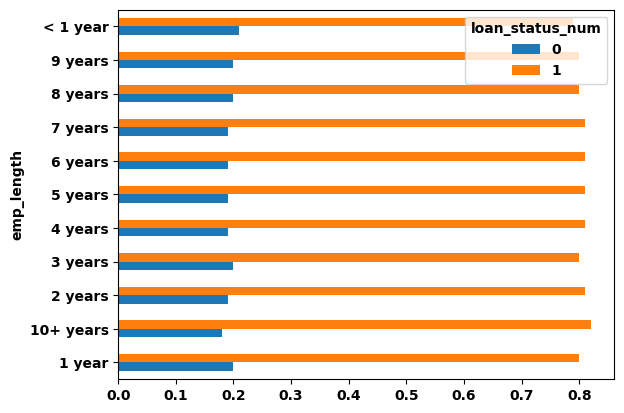

In [16]:
# Compute a simple cross tabulation of ''emp_length' and 'loan_status'. 
cross_tab = pd.crosstab(index=raw_df['emp_length'], columns=raw_df['loan_status_num'], normalize='index').round(2)

# print normalised porportions for each category of emp_length
print(cross_tab)

cross_tab.plot(kind = 'barh')

In [17]:
raw_df['emp_length_numeric'] = raw_df['emp_length'].map({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    None: None  # to handle NaN values
})

In [18]:
#  Check correlation between emp_length_numeric','emp_length'

raw_df[['emp_length_numeric','loan_status_num']].corr()

,emp_length_numeric,loan_status_num
emp_length_numeric,1.000000,0.013805
loan_status_num,0.013805,1.000000


In [19]:
# Drop columns emp_length_numeric','emp_length'
raw_df = raw_df.drop(columns = ['emp_length_numeric','emp_length'])

The above data that the proportions are quite consistent across different employment lengths. This indicates that practical impact of `emp_length` on predicting `loan_status` is limited. We may proceed to remove this column.

In [20]:
#from scipy.stats import chi2_contingency

#Create a contingency table
#contingency_table = pd.crosstab(raw_df['emp_length'], raw_df['loan_status'])

# Perform the Chi-Square test
#chi2, p, dof, expected = chi2_contingency(contingency_table)

#print("Chi-Square Statistic:", chi2)
#print("P-value:", p)
#print("Degrees of Freedom:", dof)
#print("Expected Frequencies:\n", expected)

**III. Null values in `title`**

In [21]:
# Calculate the top 5 most frequently ocurring categories in column 'title'
raw_df['title'].value_counts()[:5] 

Debt consolidation         152392
Credit card refinancing     51476
Home improvement            15245
Other                       12910
Debt Consolidation          11584
Name: title, dtype: int64

It looks like there are many duplicated categories. For instance, Debt consolidation is captured as different values. We can merge the categories to reduce the number of categories. 

Let us look at the `title` column and compare with `purpose` column.

In [22]:
raw_df[['purpose','title']].head()

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance


We observe that it has values similar to the purpose column. Infact, the `purpose` column appears to have input validation control and `title` column has appears to be more customised text. We may proceed to remove the `title` column.

In [23]:
raw_df = raw_df.drop(columns = ['title'])

**IV. Null values in `mort_acc`**

In [24]:
raw_df[['mort_acc','loan_status_num']].corr()

,mort_acc,loan_status_num
mort_acc,1.000000,0.073048
loan_status_num,0.073048,1.000000


In [25]:
raw_df[['mort_acc','loan_status']].sample(5)

,mort_acc,loan_status
59735,1.0,Fully Paid
35841,0.0,Fully Paid
104997,0.0,Fully Paid
244818,2.0,Fully Paid
319654,0.0,Fully Paid


In [26]:
raw_df.corr()['mort_acc'].round(1)

loan_amnt               0.2
int_rate               -0.1
installment             0.2
annual_inc              0.2
dti                    -0.0
open_acc                0.1
pub_rec                 0.0
revol_bal               0.2
revol_util              0.0
total_acc               0.4
mort_acc                1.0
pub_rec_bankruptcies    0.0
loan_status_num         0.1
Name: mort_acc, dtype: float64

In [27]:
raw_df['mort_acc'].value_counts()

0.0     139708
1.0      60384
2.0      49907
3.0      38022
4.0      27865
5.0      18182
6.0      11059
7.0       6050
8.0       3120
9.0       1653
10.0       863
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [28]:
# Filling nulls in column `mort_acc` with the mean value of the column
raw_df['mort_acc'].fillna(raw_df['mort_acc'].mean(), inplace=True)

In [29]:
# Check if all nulls have been removed
raw_df.isnull().sum() 

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_status_num         0
dtype: int64

We see all the nulls have been removed.

### Feature Engineering

#### Extract "State" from column `address`

In [30]:
raw_df['address'].sample(5)

184410     1888 Lyons Pass Suite 586\r\nNew Steve, NJ 00813
347390         728 Warner Gateway\r\nKeithborough, ME 00813
195493    0549 Michael Fork Suite 035\r\nEllisfurt, MD 7...
355540                         USNS Nichols\r\nFPO AP 11650
302995    33354 Wheeler Stravenue\r\nMartinezmouth, ID 0...
Name: address, dtype: object

We see that address has string format. We can use regular expessions to extract the relevant features city, state and pincode. For the purpose of this project, we will only extract `state` information.

In [31]:
# Import the module 're' helful for working regular experessions
import re

# Specify regular expression format for State and City code in the address string
state_pattern = r',\s(\w{2})\s\d+'

# Extract 'state' from 'address' column of the dataframe
raw_df['state'] = raw_df['address'].str.extract(state_pattern)


raw_df['state'].head()

0    OK
1    SD
2    WV
3    MA
4    VA
Name: state, dtype: object

#### Extract "Month" and "Year" from column "issue_d" 

In [32]:
# Extracting Month and Year from issue_d
raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d'])
raw_df['month'] = raw_df['issue_d'].dt.month
raw_df['year'] = raw_df['issue_d'].dt.year

#### Generate Insightful Financial Ratios and Debt Metrics from Existing Numerical Data"

In [33]:
# # Calculate Annual_Income/Loan Amount
# raw_df['income_by_loan_amnt'] = raw_df['annual_inc'] / raw_df['loan_amnt']

# # Calculate Annual_Income/Interest Rate
# raw_df['income_by_int_rate'] = raw_df['annual_inc'] / raw_df['int_rate']

# # Calculate Debt using dti and Annual_Income
# raw_df['debt'] = raw_df['dti'] * raw_df['annual_inc']

# # Display the updated dataframe
# print(raw_df.head())

### Discard Non-Essential Features to focus with only important features for optimised model performance and efficiency

In [34]:
raw_df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_num,state,month,year
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,OK,1,2015


In [35]:
drop_columns = ['sub_grade','earliest_cr_line', 'address','installment','issue_d','total_acc','verification_status']

raw_df = raw_df.drop(columns = drop_columns)

In [36]:
raw_df.head(1)

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status_num,state,month,year
0,10000.0,36 months,11.44,B,RENT,117000.0,Fully Paid,vacation,26.24,16.0,0.0,36369.0,41.8,w,INDIVIDUAL,0.0,0.0,1,OK,1,2015


In [37]:
raw_df.nunique()

loan_amnt                1392
term                        2
int_rate                  532
grade                       7
home_ownership              6
annual_inc              27155
loan_status                 2
purpose                    14
dti                      4262
open_acc                   60
pub_rec                    20
revol_bal               55570
revol_util               1226
initial_list_status         2
application_type            3
mort_acc                   34
pub_rec_bankruptcies        9
loan_status_num             2
state                      51
month                      12
year                       10
dtype: int64

## Exploratory Data Analysis

In [38]:
# Look for numeric columns in the dataframe
raw_df.select_dtypes("number").head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_status_num,month,year
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,0.0,0.0,1,1,2015
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,3.0,0.0,1,1,2015
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,0.0,0.0,1,1,2015
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,0.0,0.0,1,11,2014
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,1.0,0.0,0,4,2013


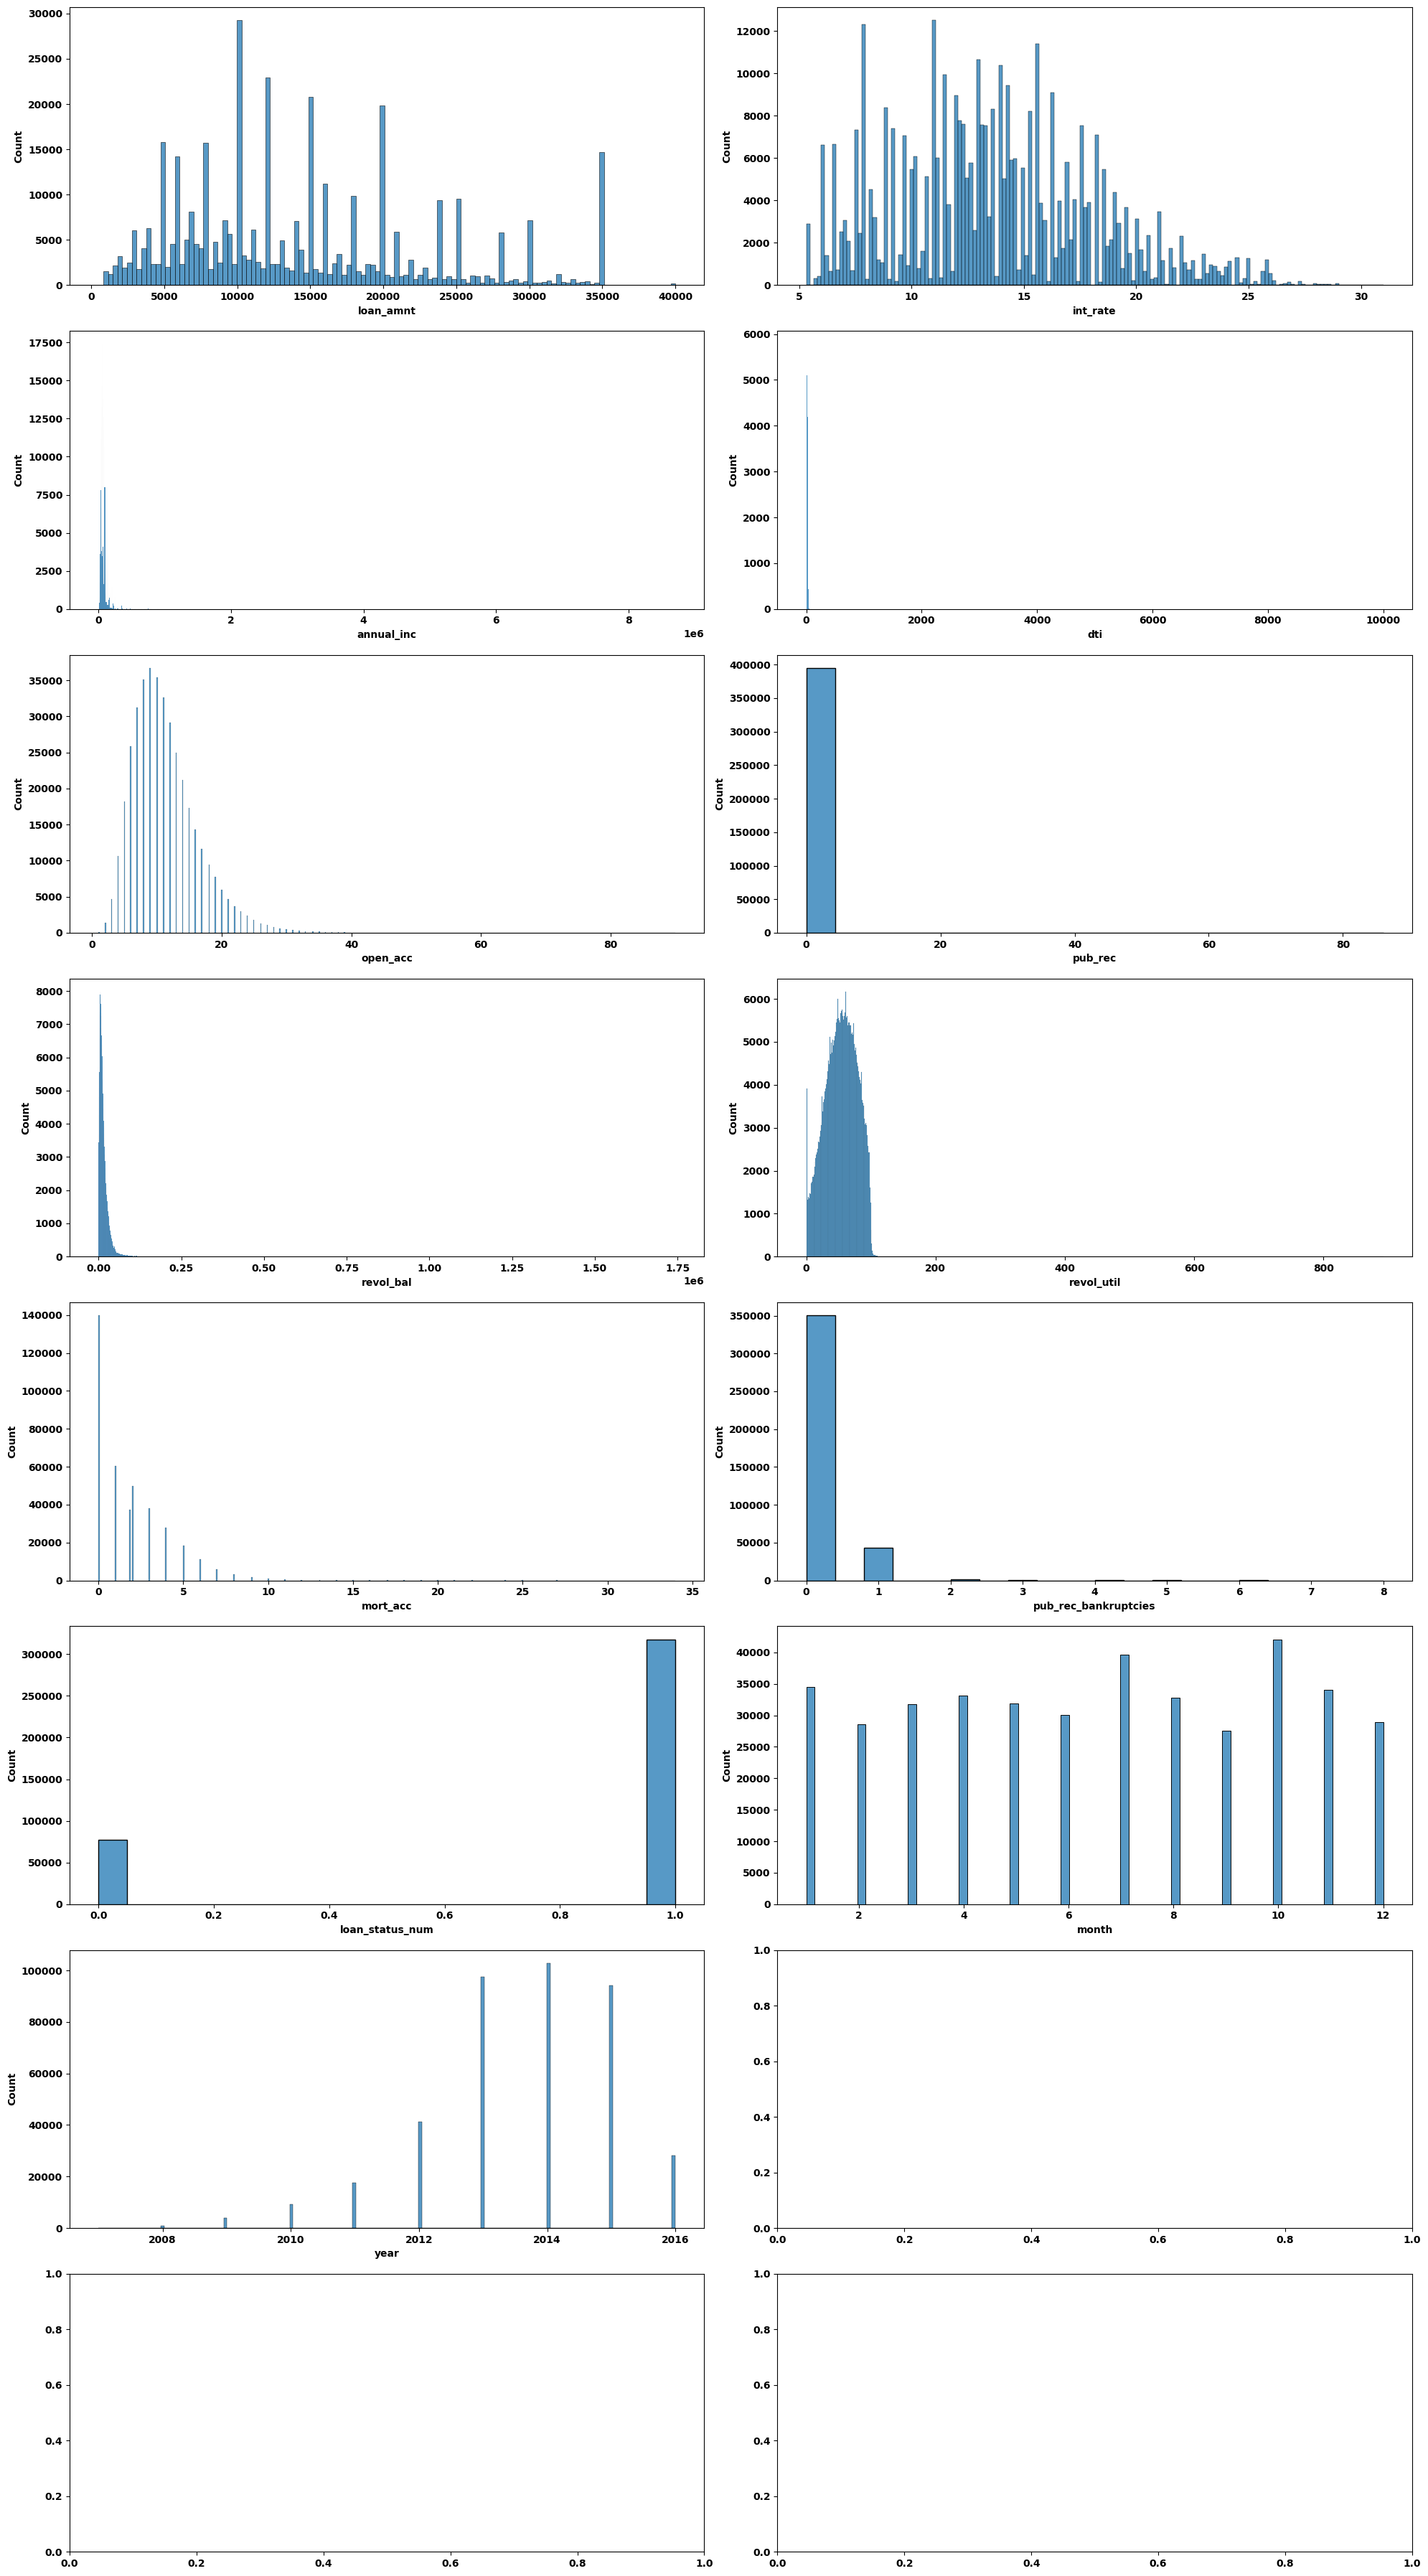

In [39]:
numeric_df = raw_df.select_dtypes("number")

plot_num = 1

plt.subplots(8,2, figsize=(20,36))

for col in numeric_df.columns:
    plt.subplot(8,2,plot_num)
    sns.histplot(raw_df[col])
    plot_num +=1

plt.tight_layout()
plt.show()

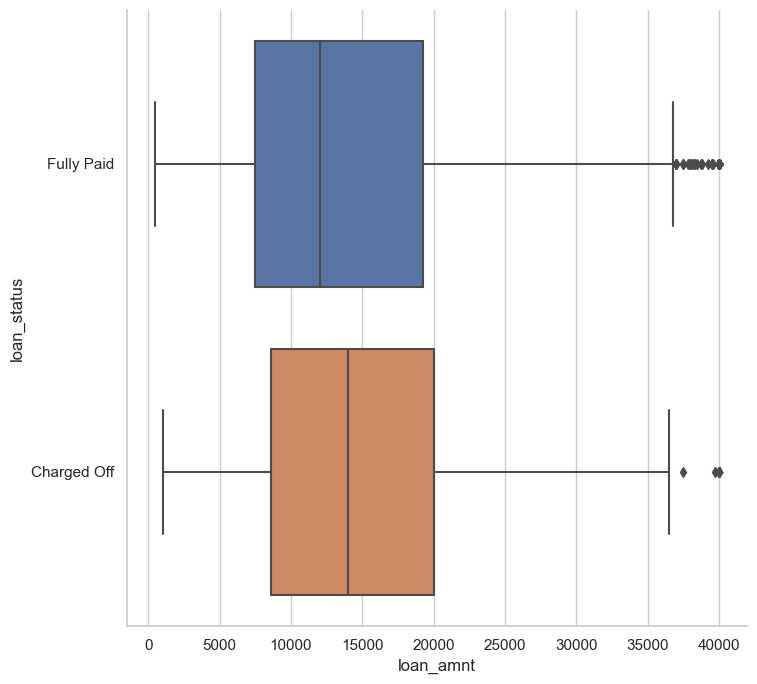

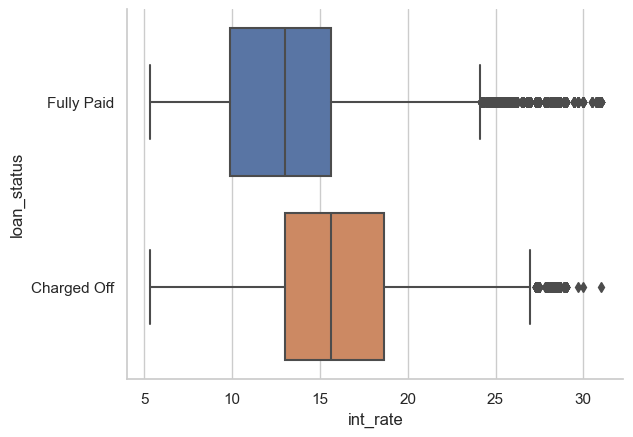

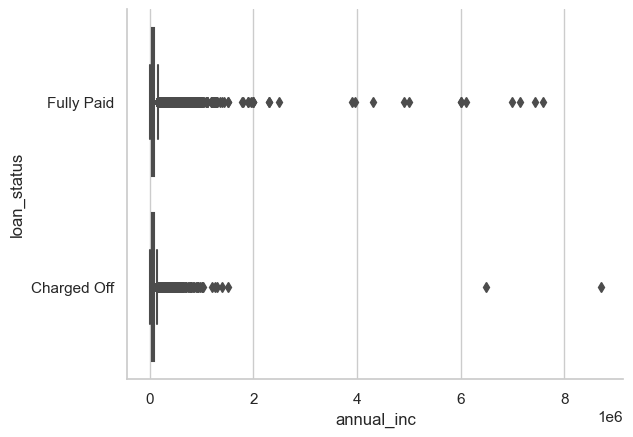

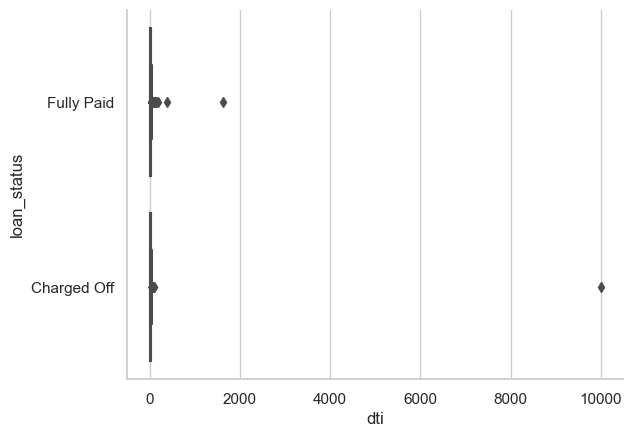

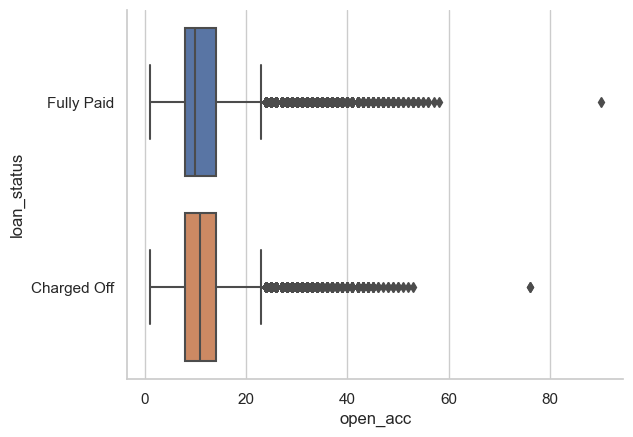

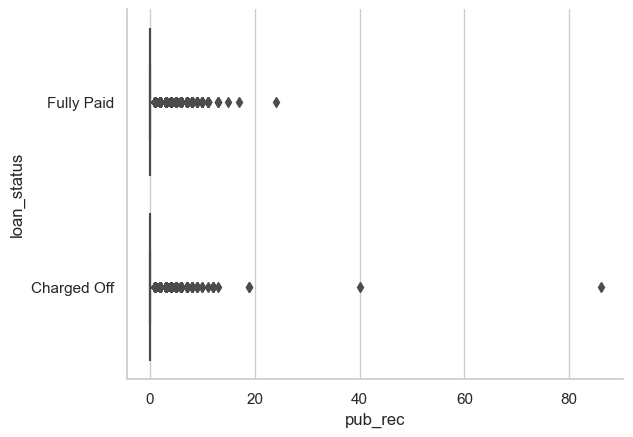

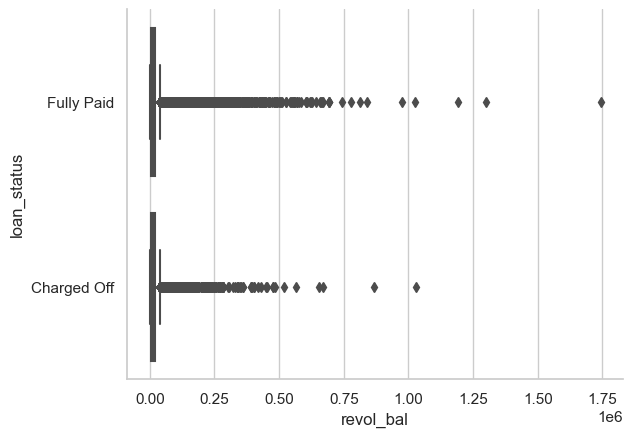

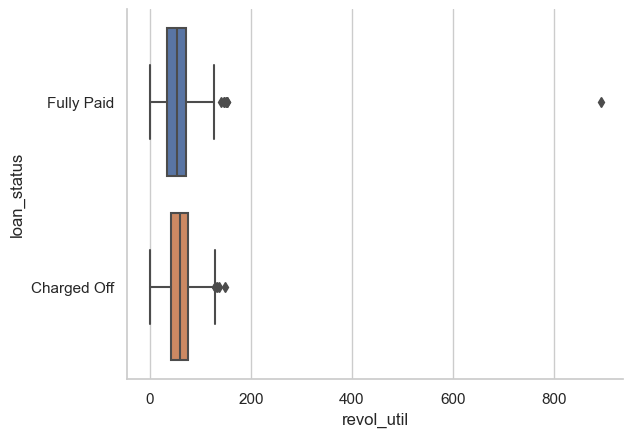

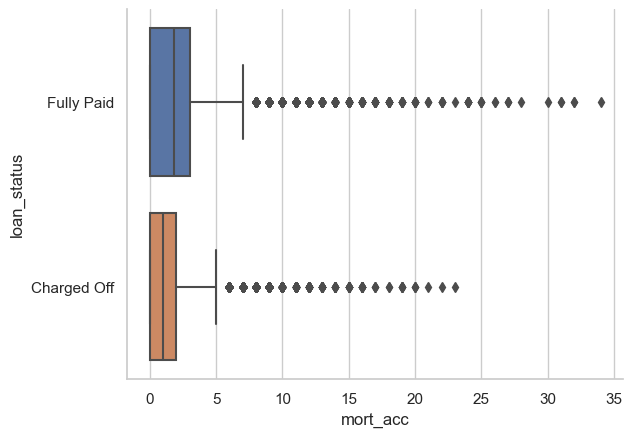

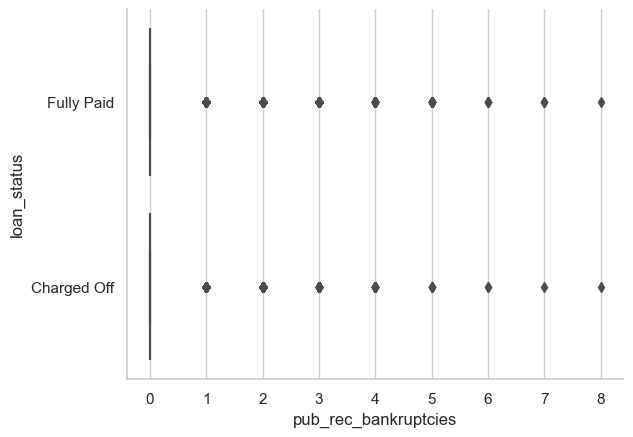

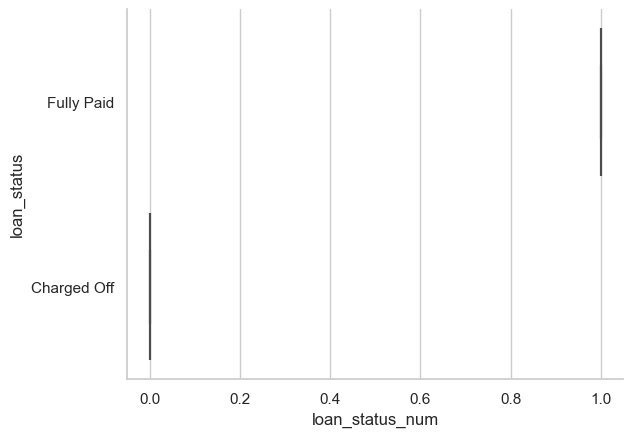

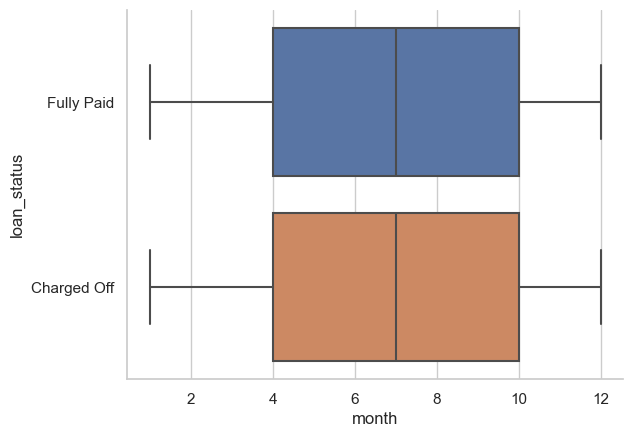

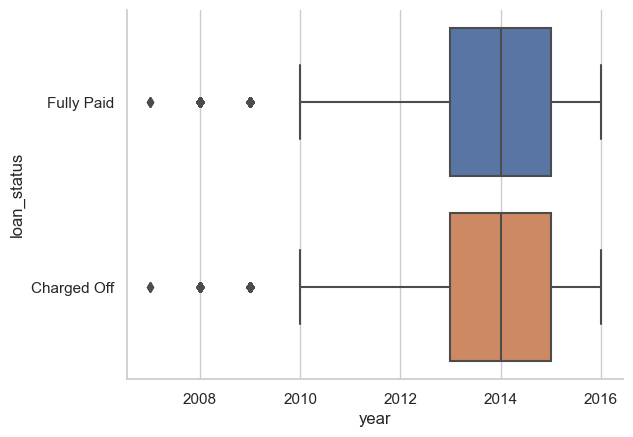

In [40]:
# Set the aesthetics for the plots (optional)
sns.set(style="whitegrid")

plt.figure(figsize = (8,8))

# Create a box plot for each numerical column in the DataFrame
for column in numeric_df.columns:
    sns.boxplot(data=raw_df, x=column, y="loan_status")
    sns.despine()
    plt.show()
    


<Figure size 1500x400 with 0 Axes>

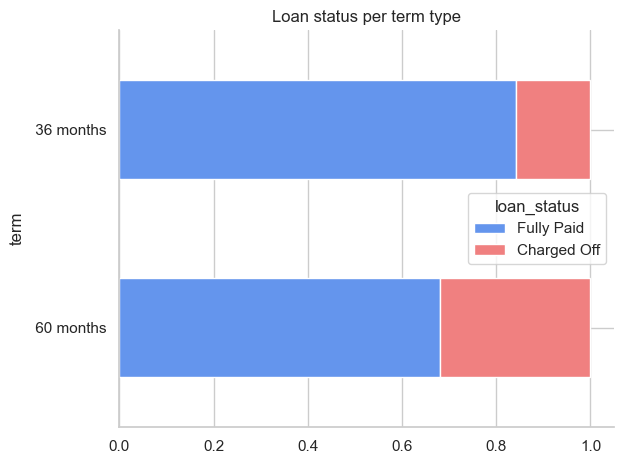

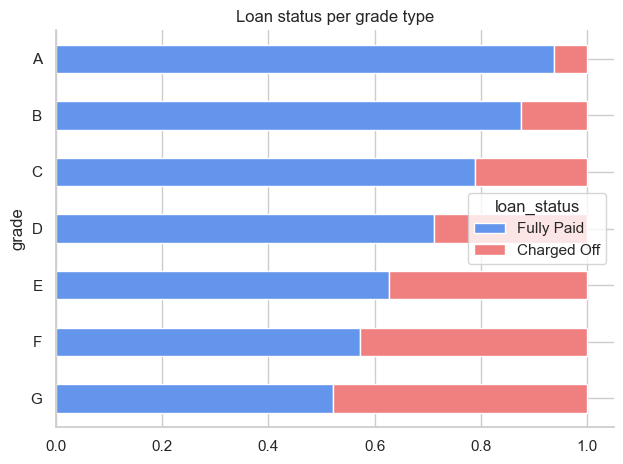

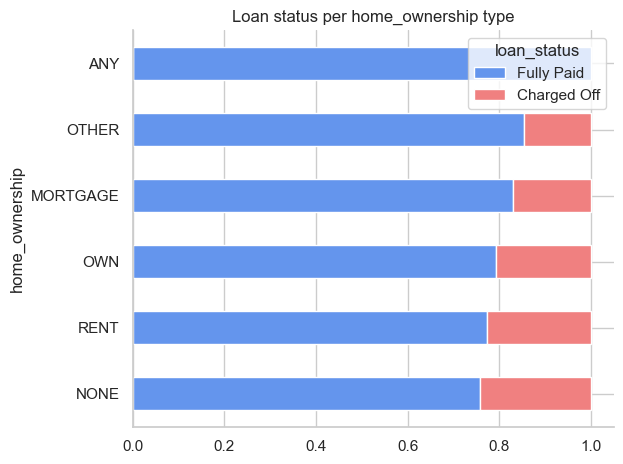

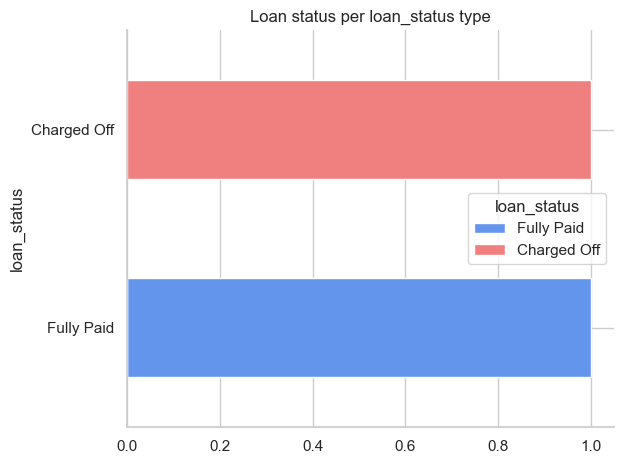

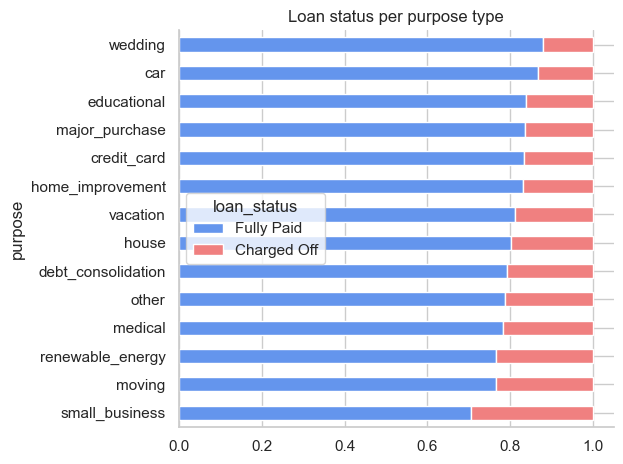

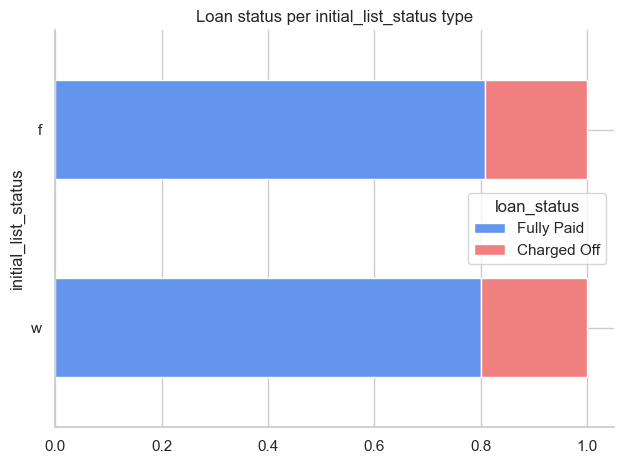

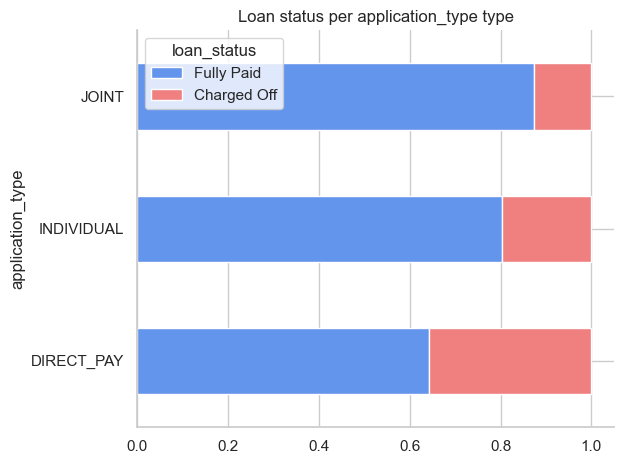

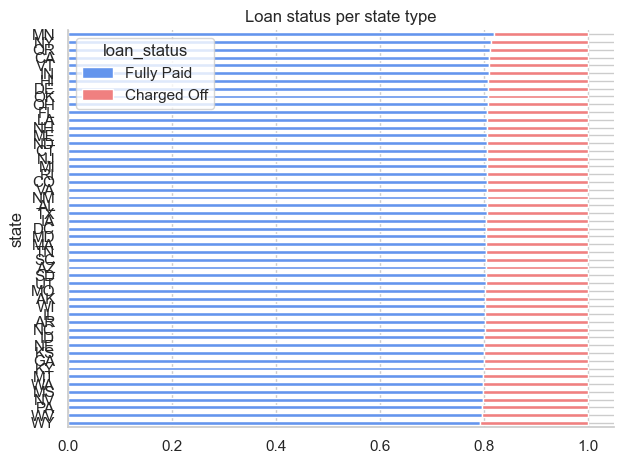

In [41]:
plt.figure(figsize = (15,4))

for column in raw_df.select_dtypes("object").columns:
    rate_data = raw_df.groupby([column, "loan_status"])["loan_status"].count() / raw_df.groupby(column)["loan_status"].count()

    rate_data.unstack()[["Fully Paid", "Charged Off"]].sort_values("Fully Paid").plot(kind="barh", stacked=True, color=["cornflowerblue", "lightcoral"])
    plt.title(f"Loan status per {column} type")
    plt.tight_layout()
    sns.despine()
    plt.show()

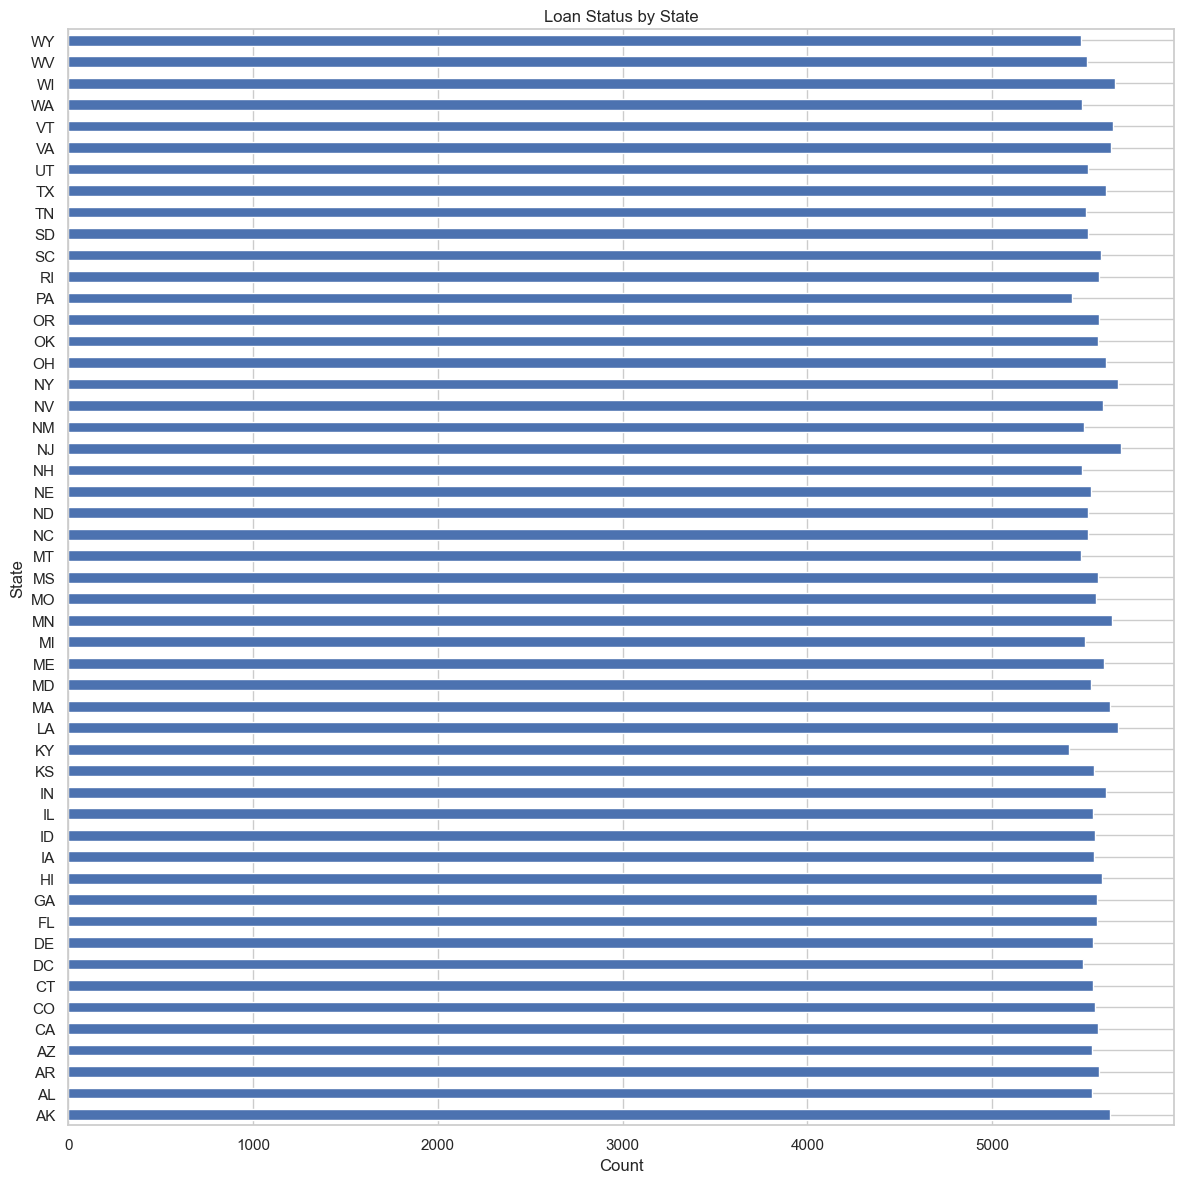

In [42]:
# Group the data by state and loan status, then count the occurrences
grouped_data = raw_df.groupby(['state', 'loan_status']).size().unstack()

# Plotting
plt.figure(figsize=(12, 12))

# If you have more than one loan status, you can loop through them or stack them
# Here's an example for a single status, you can modify it according to your data
grouped_data['Fully Paid'].plot(kind='barh')  # Replace 'Fully Paid' with your specific loan status if different

plt.title('Loan Status by State')
plt.xlabel('Count')
plt.ylabel('State')

plt.tight_layout()
plt.show()

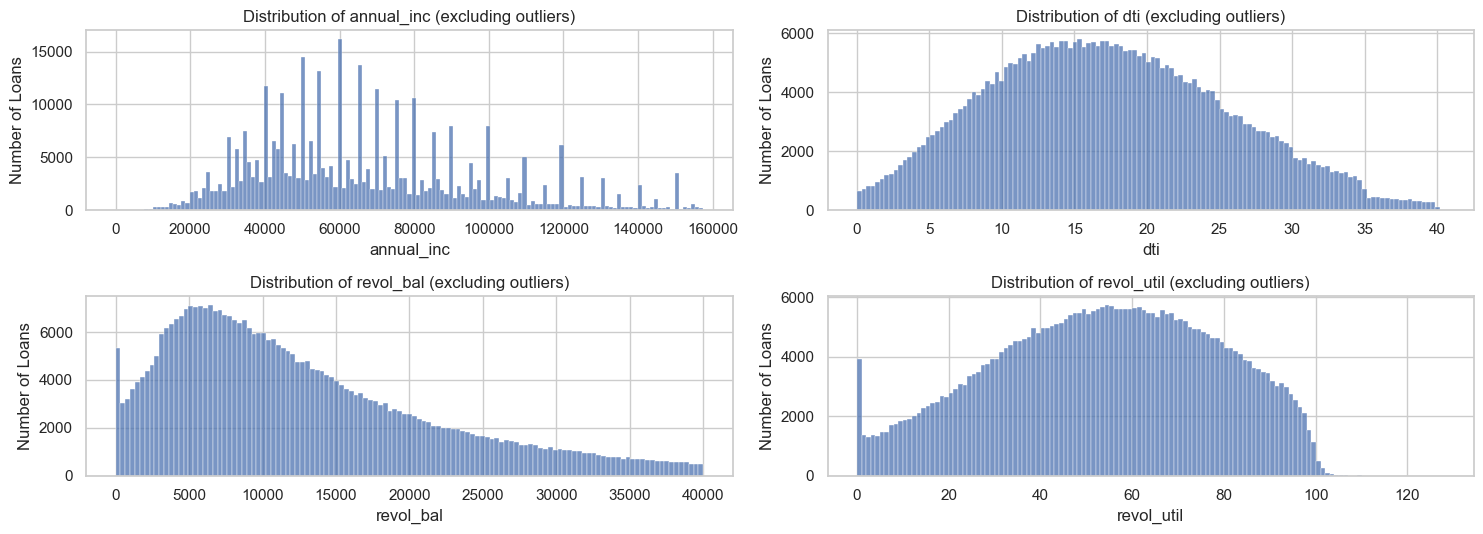

In [43]:
cols_with_outliers = ['annual_inc', 'dti', 'revol_bal', 'revol_util']

plt.subplots(2,2, figsize=(15,5.5))
plot_num = 1

for col in cols_with_outliers:
    q1 = raw_df[col].quantile(0.25)
    q3 = raw_df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = raw_df[(raw_df[col] >= lower_bound) & (raw_df[col] <= upper_bound)]

    plt.subplot(2, 2, plot_num)  # Adjust the subplot grid as needed
    
    sns.histplot(filtered_data[col])
    plt.title(f"Distribution of {col} (excluding outliers)")
    plt.xlabel(col)
    plt.ylabel("Number of Loans")

    plot_num += 1

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [44]:
# #categorical_cols = ['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status',
#                   #'issue_d', 'loan_status','purpose','title','initial_list_status','application_type']

# categorical_cols = ['term','grade','home_ownership','verification_status','loan_status',
#                    'initial_list_status','application_type']

# plot_num = 1

# plt.subplots(4, 2, figsize=(15, 10))

# for col in categorical_cols:
#     plt.subplot(4, 2, plot_num)
    
#     # Calculate normalized counts manually
#     counts = raw_df[col].value_counts(normalize=True)
    
#     # Plot the bar chart
#     sns.barplot(x=counts.index, y=counts.values)
    
#     plt.title(f"Normalized Count of {col}")
#     plt.xlabel(col)
#     plt.ylabel("Percentage")
#     plot_num += 1

# plt.tight_layout()
# plt.show()

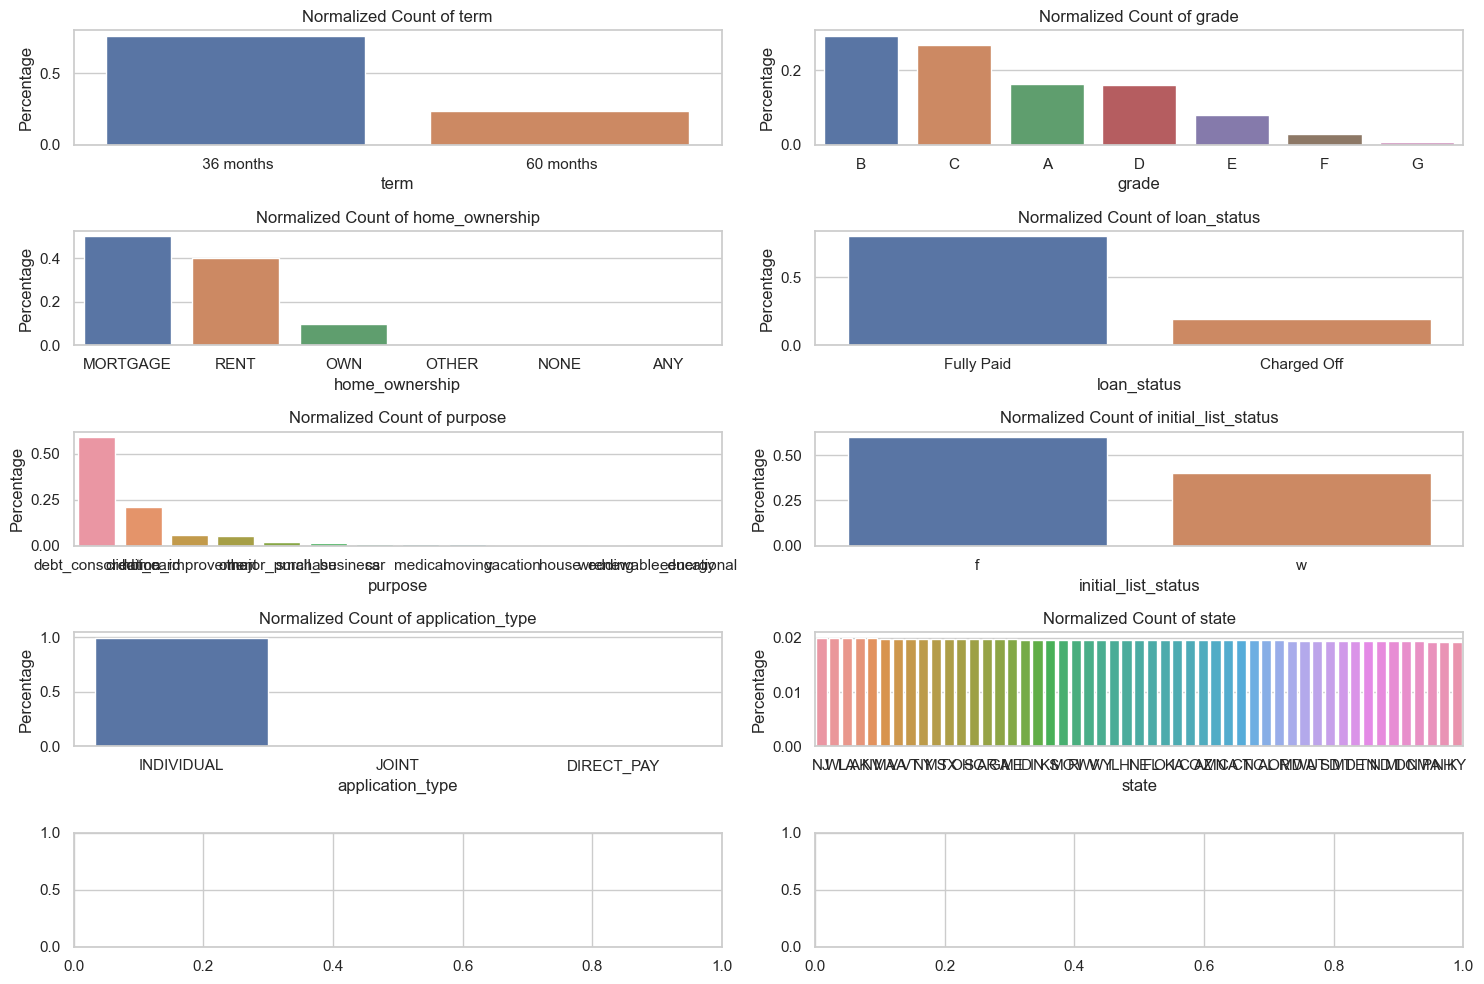

In [45]:
categorical_df = raw_df.select_dtypes("object")


plot_num = 1

plt.subplots(5, 2, figsize=(15, 10))

for col in categorical_df.columns:
    plt.subplot(5, 2, plot_num)
    
    # Calculate normalized counts manually
    counts = raw_df[col].value_counts(normalize=True)
    
    # Plot the bar chart
    sns.barplot(x=counts.index, y=counts.values)
    
    plt.title(f"Normalized Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plot_num += 1

plt.tight_layout()
plt.show()

1. Maximum loans are in the range of 5k to 12.5k USD.
2. Minimum loans are extended in range of 27k to 32k USD.


Most loans are in the range of 11% to 16%. The loans above 21% taper off.

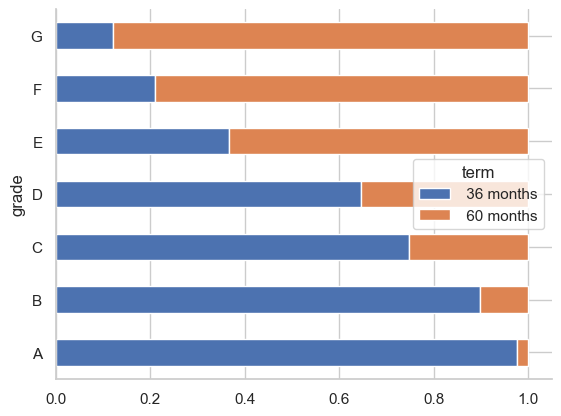

In [46]:
rates = raw_df.groupby(["grade", "term"])["term"].count()/raw_df.groupby(["grade"])["term"].count()
rates.unstack().plot(kind="barh", stacked=True)
sns.despine()

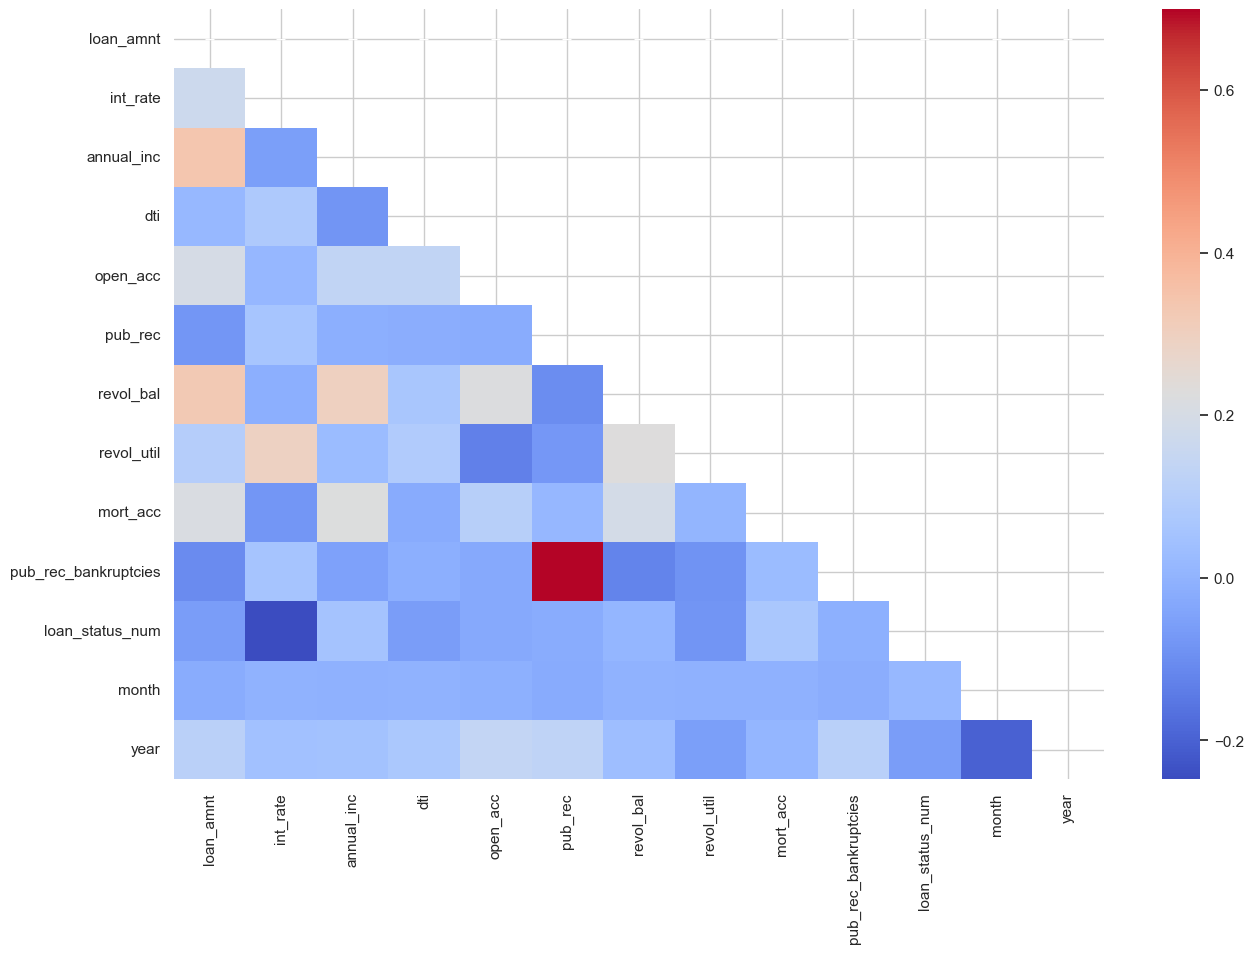

In [47]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(raw_df.corr(), dtype=bool))

# Set up the figure with size
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask
sns.heatmap(data = raw_df.corr(), cmap="coolwarm", annot=True, mask=mask)

plt.show()


In [48]:
raw_df['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (loan_status)

In [49]:
raw_df = raw_df.drop(columns = ['loan_status'])
categorical_df = categorical_df.drop(columns = ['loan_status'])

In [50]:
raw_df = raw_df.drop(columns = ['purpose'])
raw_df = raw_df.drop(columns = ['state'])

In [51]:

categorical_df = categorical_df.drop(columns = ['purpose'])


In [52]:
categorical_df = categorical_df.drop(columns = ['state'])

In [53]:
dummies_df = pd.get_dummies(categorical_df, drop_first=True)

# Now, concatenate the numerical columns with the original dataframe

processed_df = pd.concat([raw_df, dummies_df], axis=1)

# Drop the original categorical columns if needed
processed_df = processed_df.drop(categorical_df.columns, axis=1)



# Now, processed_df contains the original numerical columns and the one-hot encoded categorical columns

In [54]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    395219 non-null  float64
 1   int_rate                     395219 non-null  float64
 2   annual_inc                   395219 non-null  float64
 3   dti                          395219 non-null  float64
 4   open_acc                     395219 non-null  float64
 5   pub_rec                      395219 non-null  float64
 6   revol_bal                    395219 non-null  float64
 7   revol_util                   395219 non-null  float64
 8   mort_acc                     395219 non-null  float64
 9   pub_rec_bankruptcies         395219 non-null  float64
 10  loan_status_num              395219 non-null  int64  
 11  month                        395219 non-null  int64  
 12  year                         395219 non-null  int64  
 13 

In [55]:
processed_df.shape

(395219, 28)

In [56]:
#processed_df = processed_df.drop(columns=["revol_bal","installment","revol_util","open_acc","grade_B","grade_C","grade_D","grade_E","purpose_moving","purpose_other","purpose_renewable_energy","purpose_small_business","purpose_vacation","purpose_wedding"])

In [57]:
#processed_df = processed_df.drop(columns = ["grade_F","grade_G","home_ownership_MORTGAGE","home_ownership_NONE","home_ownership_OTHER","home_ownership_OWN","home_ownership_RENT","verification_status_Source Verified","verification_status_Verified","purpose_credit_card","purpose_debt_consolidation","purpose_educational","purpose_home_improvement","purpose_house","purpose_major_purchase","purpose_medical","initial_list_status_w"])

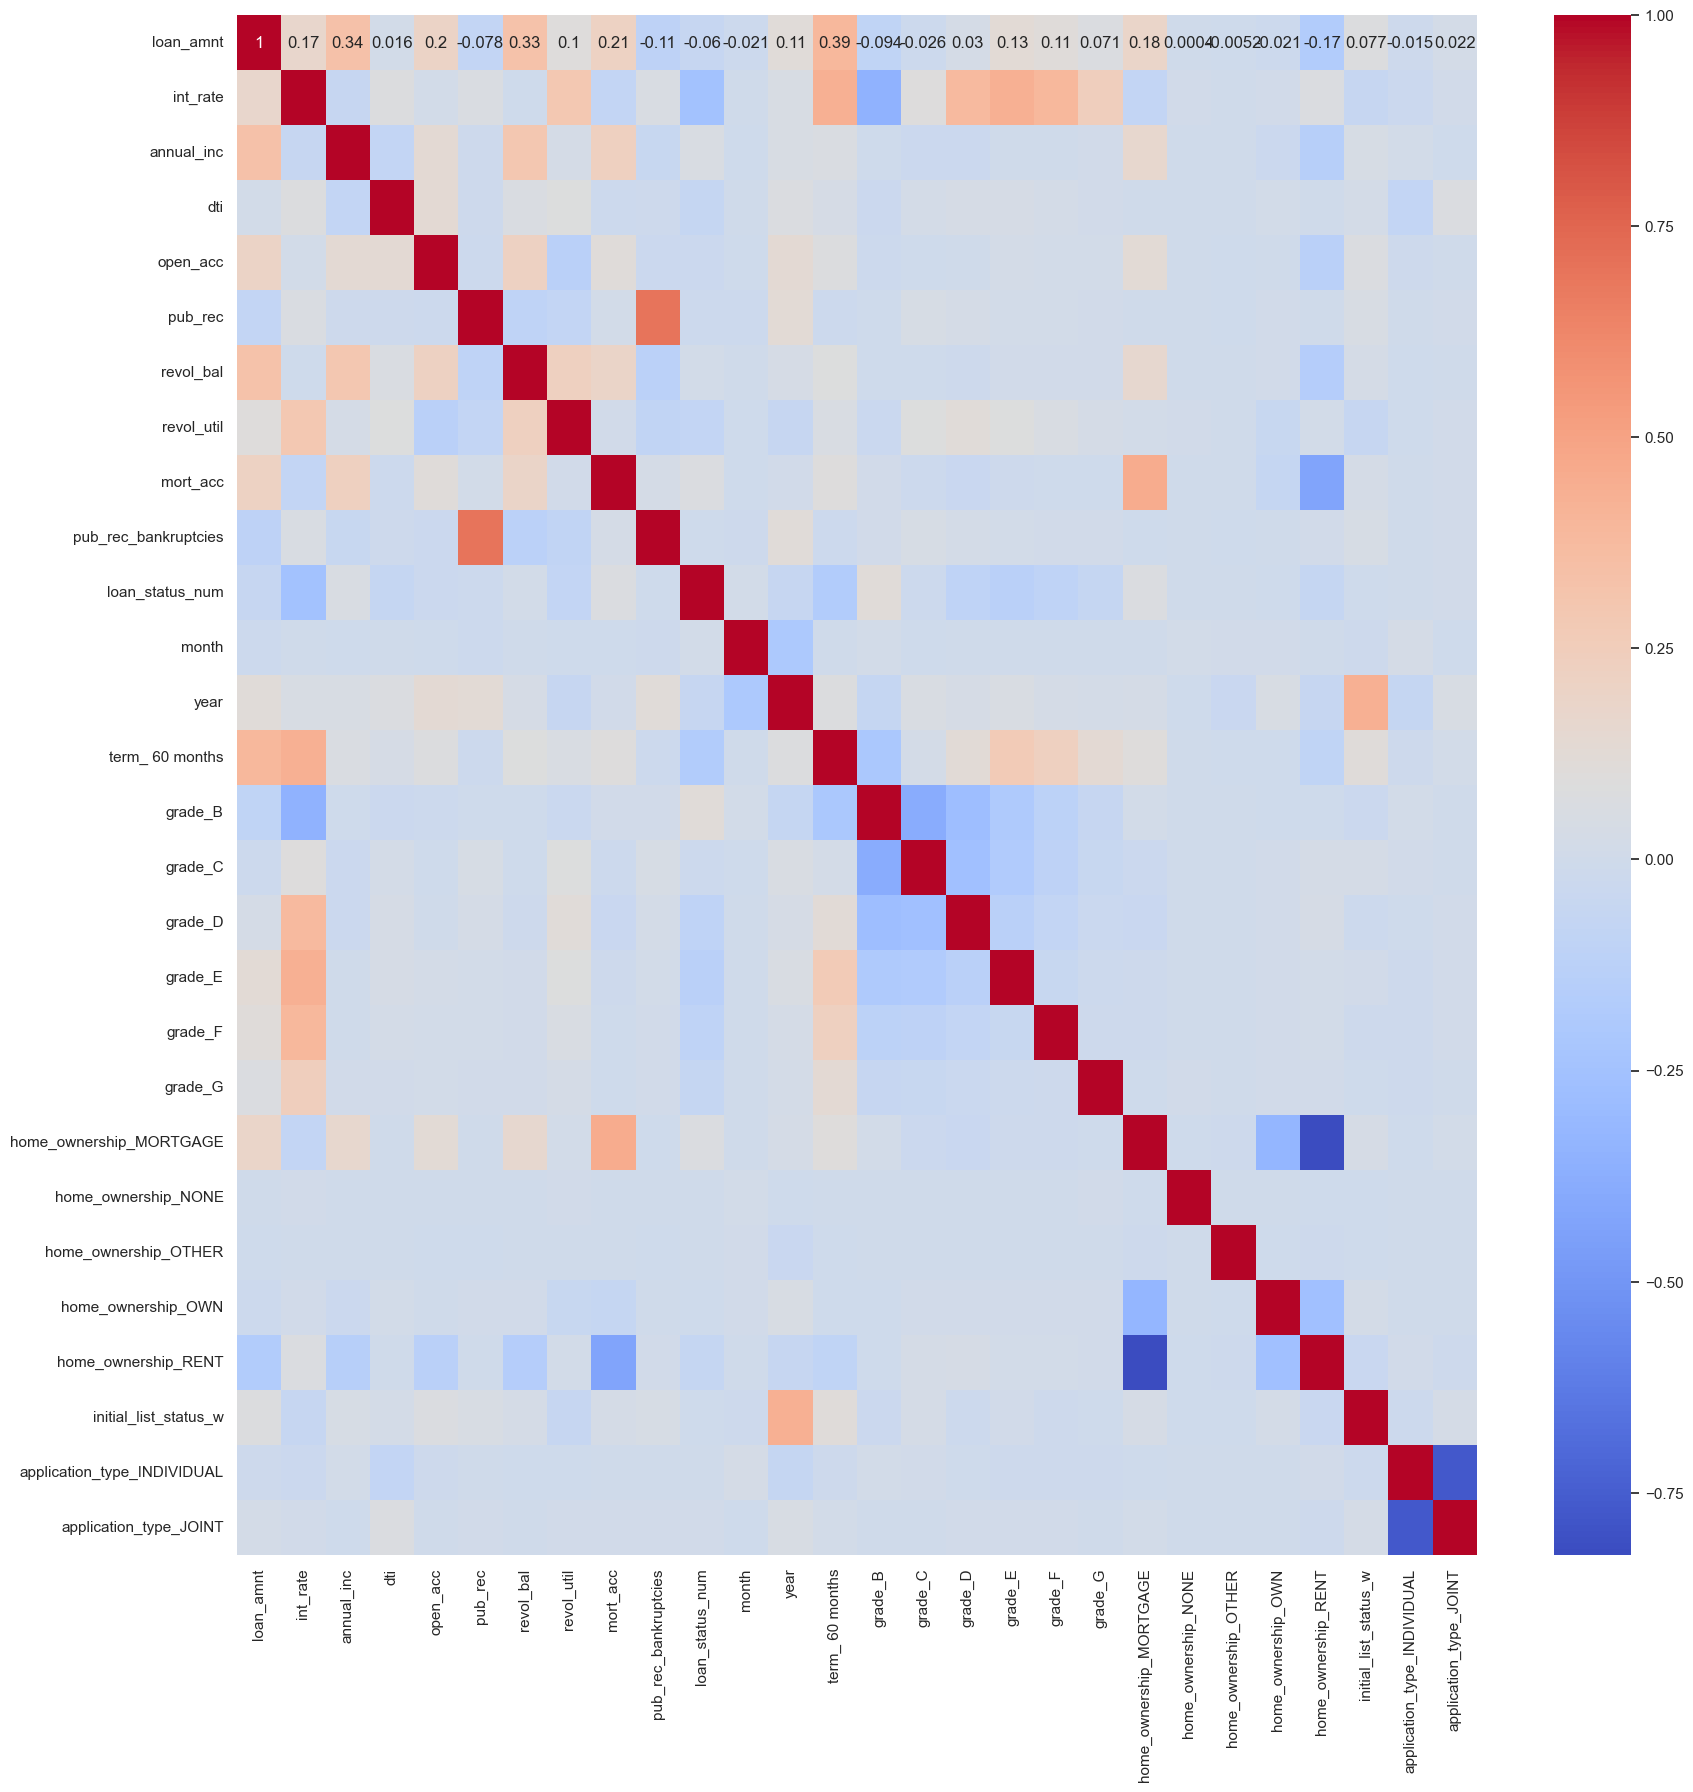

In [58]:
# Set up the figure with size
plt.figure(figsize = (20,20))

# Draw the heatmap with the mask
sns.heatmap(data = processed_df.corr(), cmap="coolwarm", annot=True)

plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Select features (X) and target variable (y)
X = processed_df.drop('loan_status_num', axis=1)  #  'loan_status' is target variable
y = processed_df['loan_status_num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=49)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform all columns in training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform all columns in testing set
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [60]:
X_train_scaled.shape

(335936, 27)

In [61]:
processed_df[processed_df['loan_status_num'] == 1].shape[0]/processed_df[['loan_status_num']].shape[0]

0.8038479931379817

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize Logistic Regression model
model = LogisticRegression(random_state=449)

# Fit the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.8081

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.05      0.10     11585
           1       0.81      0.99      0.89     47698

    accuracy                           0.81     59283
   macro avg       0.71      0.52      0.50     59283
weighted avg       0.77      0.81      0.74     59283



accuracy: 0.8073

Accuracy is the ratio of correctly predicted observations to the total observations.
In this case, the model correctly predicts the class for approximately 80.73% of the instances.
Precision, Recall, and F1-Score for Class 0 (Charged Off)

Precision (Positive Predictive Value): 0.57
Of all instances predicted as "Charged Off," 57% were actually "Charged Off."
Recall (Sensitivity or True Positive Rate): 0.05
Of all actual "Charged Off" instances, only 5% were correctly predicted.
F1-Score: 0.10
The harmonic mean of precision and recall.

Accuracy: 0.8073

Accuracy is the ratio of correctly predicted observations to the total observations.
In this case, the model correctly predicts the class for approximately 80.73% of the instances.
Precision, Recall, and F1-Score for Class 0 (Charged Off)

Precision (Positive Predictive Value): 0.57
Of all instances predicted as "Charged Off," 57% were actually "Charged Off."
Recall (Sensitivity or True Positive Rate): 0.05
Of all actual "Charged Off" instances, only 5% were correctly predicted.
F1-Score: 0.10
The harmonic mean of precision and recall.

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the SMOTE class with desired sampling strategy (50:50 balance)
sampling_strategy = 1.0  # Adjust this to achieve a 50:50 balance
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# Initialize Logistic Regression model
model = LogisticRegression(random_state=449)

# Fit the model on the resampled training set
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.6427

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.66      0.42     11585
           1       0.89      0.64      0.74     47698

    accuracy                           0.64     59283
   macro avg       0.60      0.65      0.58     59283
weighted avg       0.77      0.64      0.68     59283



In [64]:
# C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1,
#                    1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])


# # Lists to store training and testing scores
# train_scores = []
# test_scores = []

# # Iterate over different values of C
# for C_value in C_range:
#     # Initialize Logistic Regression model with the current C value
#     model = LogisticRegression(C=C_value, random_state=1)

#     # Fit the model on the resampled training set
#     model.fit(X_train_resampled, y_train_resampled)

#      # Make predictions on the training set
#     y_train_pred = model.predict(X_train_resampled)
    
#     # Make predictions on the testing set
#     y_test_pred = model.predict(X_test_scaled)

#     # Append testing scores to the respective list
#     train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
#     test_scores.append(accuracy_score(y_test, y_test_pred))

# # Plotting results
# plt.figure()
# plt.plot(C_range, train_scores, label='Train Score', marker='.')
# plt.plot(C_range, test_scores, label='Test Score', marker='.')
# plt.xlabel('C (Log Scale)')
# plt.ylabel('Accuracy')
# plt.xscale("log")
# plt.grid()
# plt.legend()
# plt.show()

In [65]:
# Assuming 'y' is your output variable
class_counts = np.bincount(y_train_resampled)
class_0_count = class_counts[0]  # Count of class 0
class_1_count = class_counts[1]  # Count of class 1

print(f"Percentage of Class 0 : {class_0_count * 100 /(class_0_count+class_1_count)}")
print(f"Percentage of Class 1 : {class_1_count * 100 /(class_0_count+class_1_count)}")

Percentage of Class 0 : 50.0
Percentage of Class 1 : 50.0


In [66]:
# from sklearn.ensemble import RandomForestClassifier


# # Initialize and train a Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators = 5 ,random_state=42)
# rf_classifier.fit(X_train_resampled, y_train_resampled)


# # Make predictions on the training set
# y_train_pred = rf_classifier.predict(X_train_resampled)


# # Make predictions on the testing set
# y_test_pred = rf_classifier.predict(X_test_scaled)

# # Evaluate the model

# accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
# accuracy_test = accuracy_score(y_test, y_test_pred)

# classification_report_str_train = classification_report(y_train_resampled, y_train_pred)
# classification_report_str_test = classification_report(y_test, y_test_pred)

# # Display the results
# print(f"Accuracy for Train set: {accuracy_train:.4f}")
# print(f"Accuracy for Test set: {accuracy_test:.4f}")


# print("\nClassification Reportfor train set :\n", classification_report_str_train)

# print("\nClassification Reportfor test set :\n", classification_report_str_test)

In [67]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Lists to store training and testing scores
train_scores = []
test_scores = []

n_estimators_range = [1,10, 50,150, 300]

# Iterate over different values of n_estimators
for n_estimators_value in n_estimators_range:
    # Initialize Random Forest Classifier with the current n_estimators value
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators_value, min_samples_leaf = 5, min_samples_split = 5, random_state=42)
    
    # Fit the model on the training set
    rf_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = rf_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = rf_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(n_estimators_range, train_scores, label='Train Score', marker='.')
plt.plot(n_estimators_range, test_scores, label='Test Score', marker='.')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Range of values for max_depth
max_depth_range = [2, 5, 10, 15, 20, 25, None]

# Iterate over different values of max_depth
for depth in max_depth_range:
    # Initialize Decision Tree Classifier with the current max_depth value
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Fit the model on the training set
    dt_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = dt_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = dt_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(max_depth_range, train_scores, label='Train Score', marker='o')
plt.plot(max_depth_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance')
plt.grid(True)
plt.legend()
plt.show()


<Axes: >

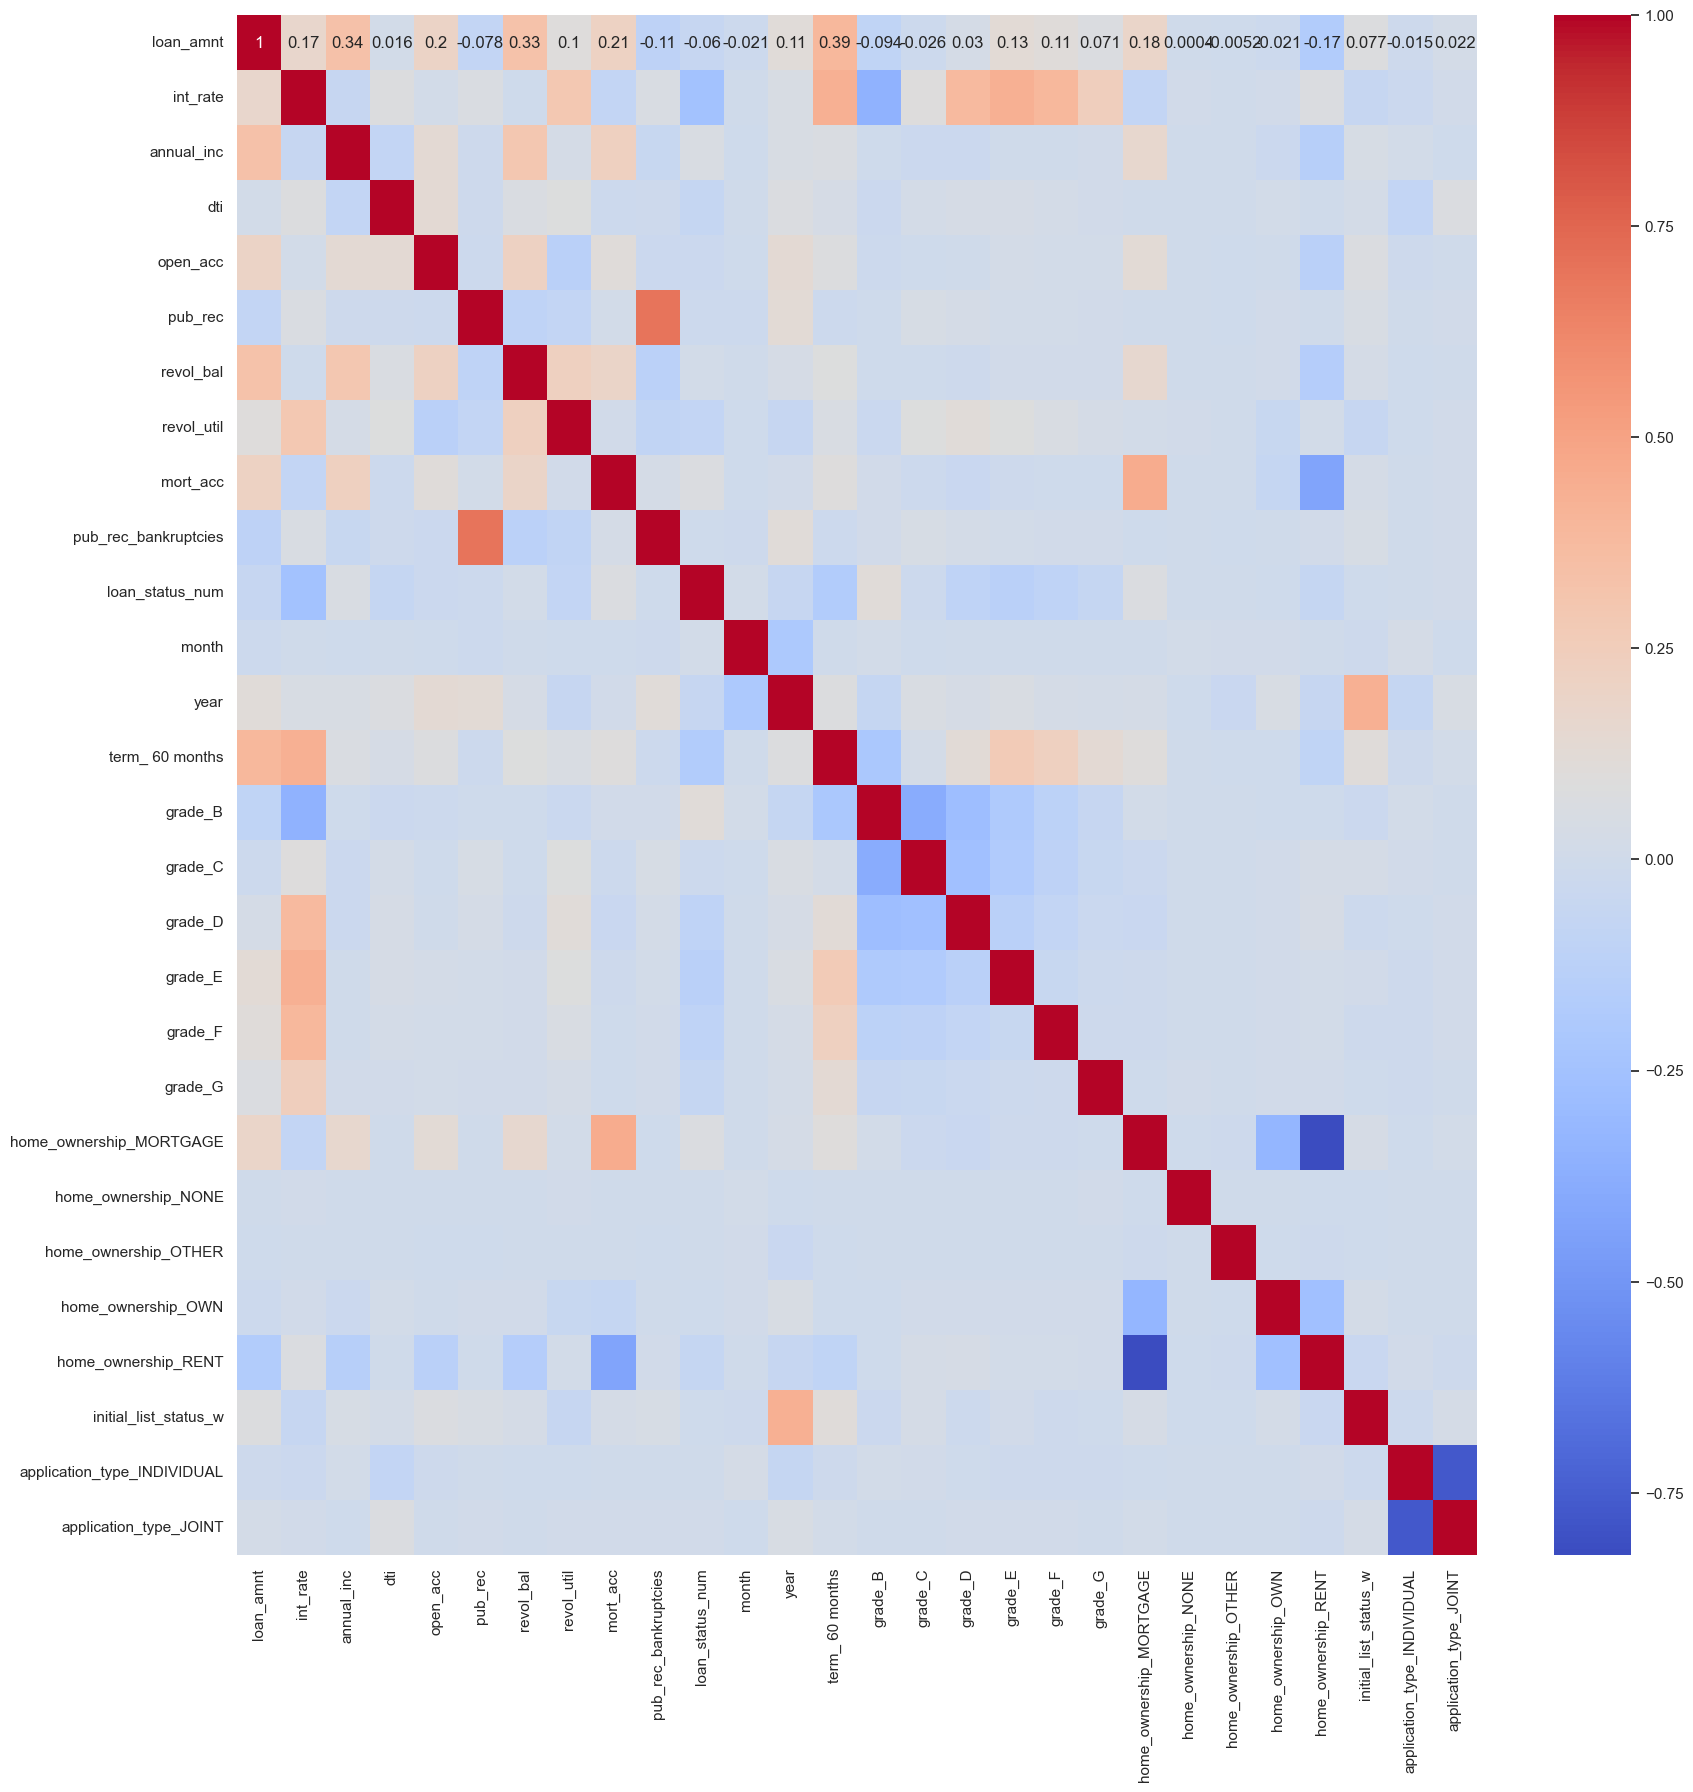

In [70]:
# Set up the figure with size
plt.figure(figsize = (20,20))

# Draw the heatmap with the mask
sns.heatmap(data = processed_df.corr(), cmap="coolwarm", annot=True)

# plt.show()


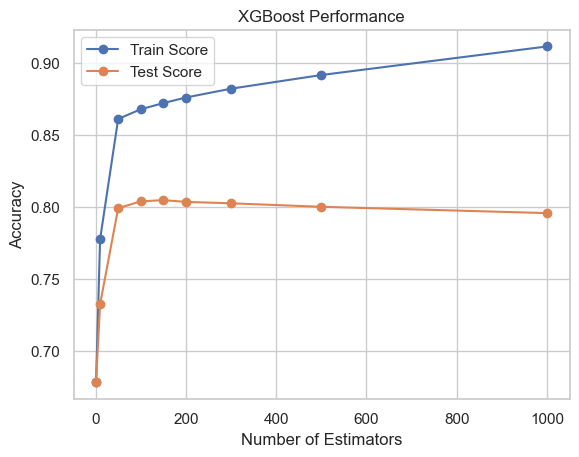

In [80]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

train_scores = []
test_scores = []

# Range of values for n_estimators
n_estimators_range = [1, 10, 50, 100, 150,200,300]

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize XGBoost Classifier with the current n_estimators value
    xgb_classifier = XGBClassifier(n_estimators=n_estimators, random_state=100)
    
    # Fit the model on the training set
    xgb_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = xgb_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = xgb_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(n_estimators_range, train_scores, label='Train Score', marker='o')
plt.plot(n_estimators_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('XGBoost Performance')
plt.grid(True)
plt.legend()
plt.show()

In [81]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

# Range of values for n_estimators
n_estimators_range = [1, 10, 50, 100, 150, 200, 300]

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize CatBoost Classifier with the current n_estimators value
    cat_classifier = CatBoostClassifier(n_estimators=n_estimators, random_state=100, verbose=0)
    
    # Fit the model on the training set
    cat_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = cat_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = cat_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(n_estimators_range, train_scores, label='Train Score', marker='o')
plt.plot(n_estimators_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('CatBoost Performance')
plt.grid(True)
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'catboost'